# EXPLORATORY DATA ANALYSIS 

In [1]:
import pandas as pd
import sqlite3 as sq
import seaborn as sns
import matplotlib.pyplot as plt
import utils as ut

URL = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
total_data = pd.read_csv(URL)

Note: The 'utils.py' file contains specific functions to plot according to the standards of Exploratory Data Analysis (EDA) and Descriptive Data Analysis (DDA)

    ANALYSIS OF MULVIARIATE VARIABLES

_NOTE: Since there are no categorical variables besides the already factorized target "Outcome," there is no need for Categorical-Categorical analysis or variable factorization_.

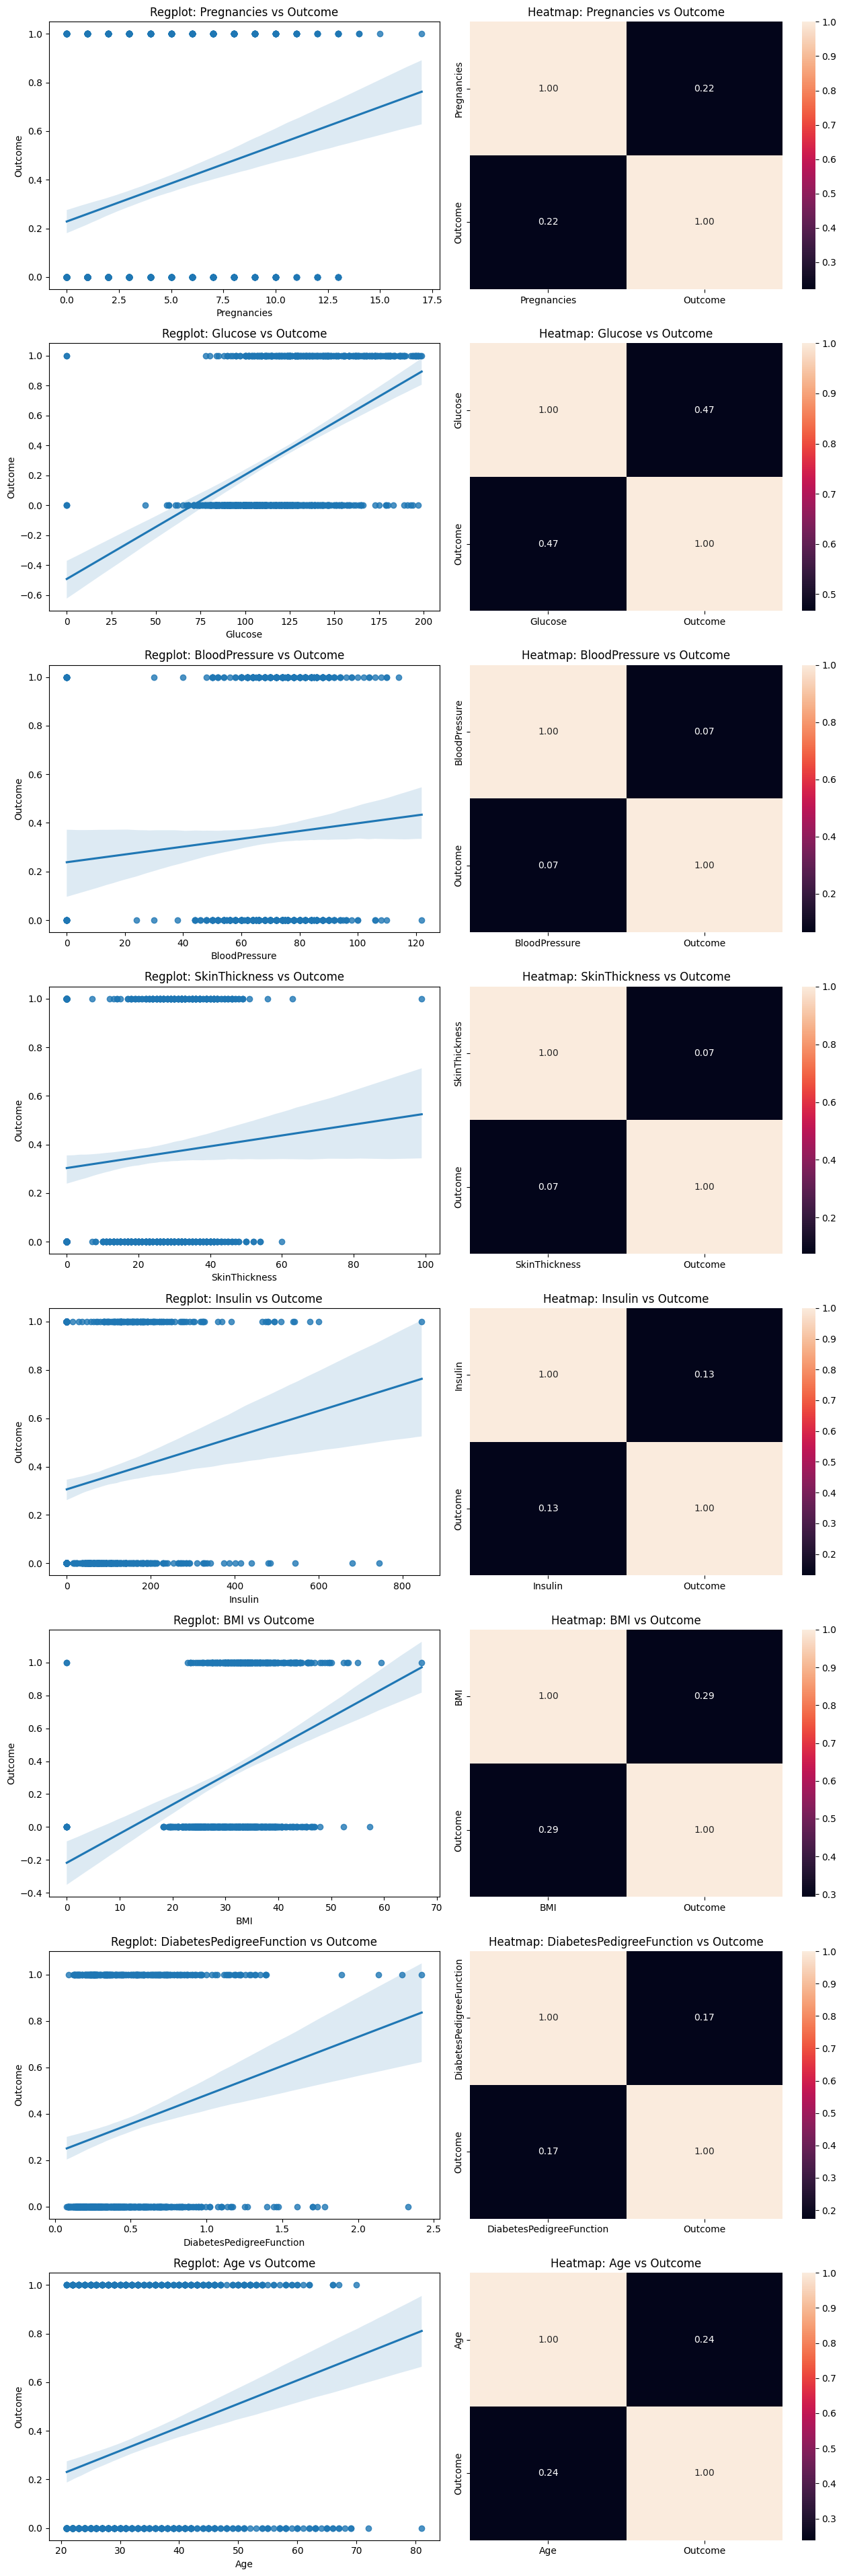

In [2]:
# CUSTOM FUNCTION FOR NUMERICAL-NUMERICAL ANALYSIS
ut.plot_scatter_heatmaps(total_data,'Outcome')

Conclusions:

**Strong associations** were found between the predictor variables and the target variable (Outcome) for the following:

-Glucose (0.47)

-BMI (Body Mass Index) (0.29)

-Age (0.24)

-Pregnancies (0.22)

**Weak associations** were observed for the following variables:

-DiabetesPedigreeFunction (0.17)

-Insuline (0.13)

-Blood Pressure (0.07)

-skin thickness (0.07)



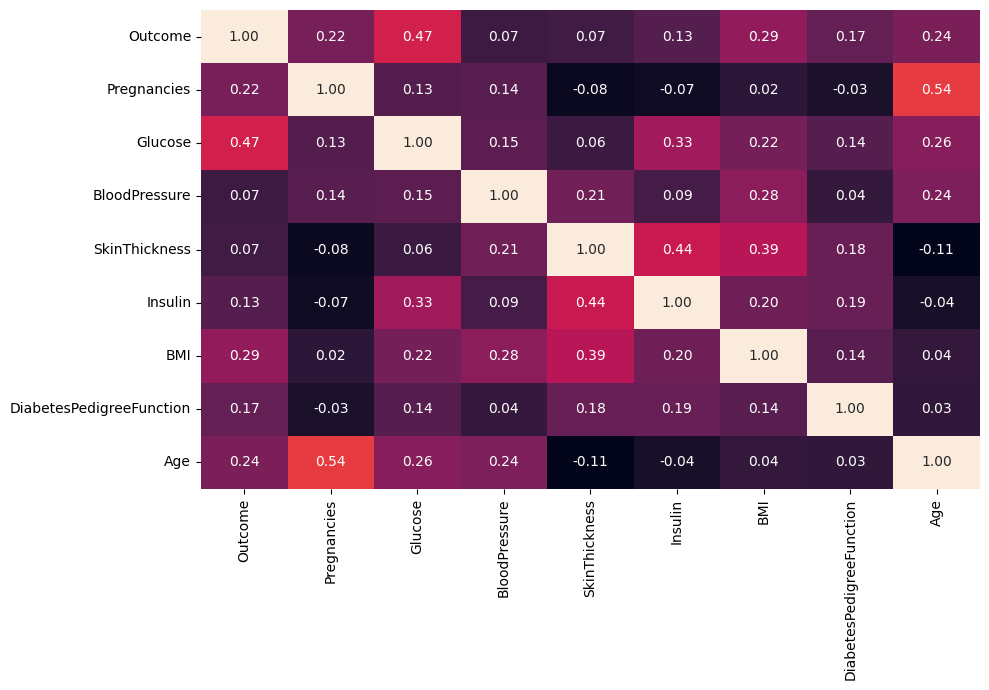

In [3]:
ut.general_heatmap(total_data,'Outcome')

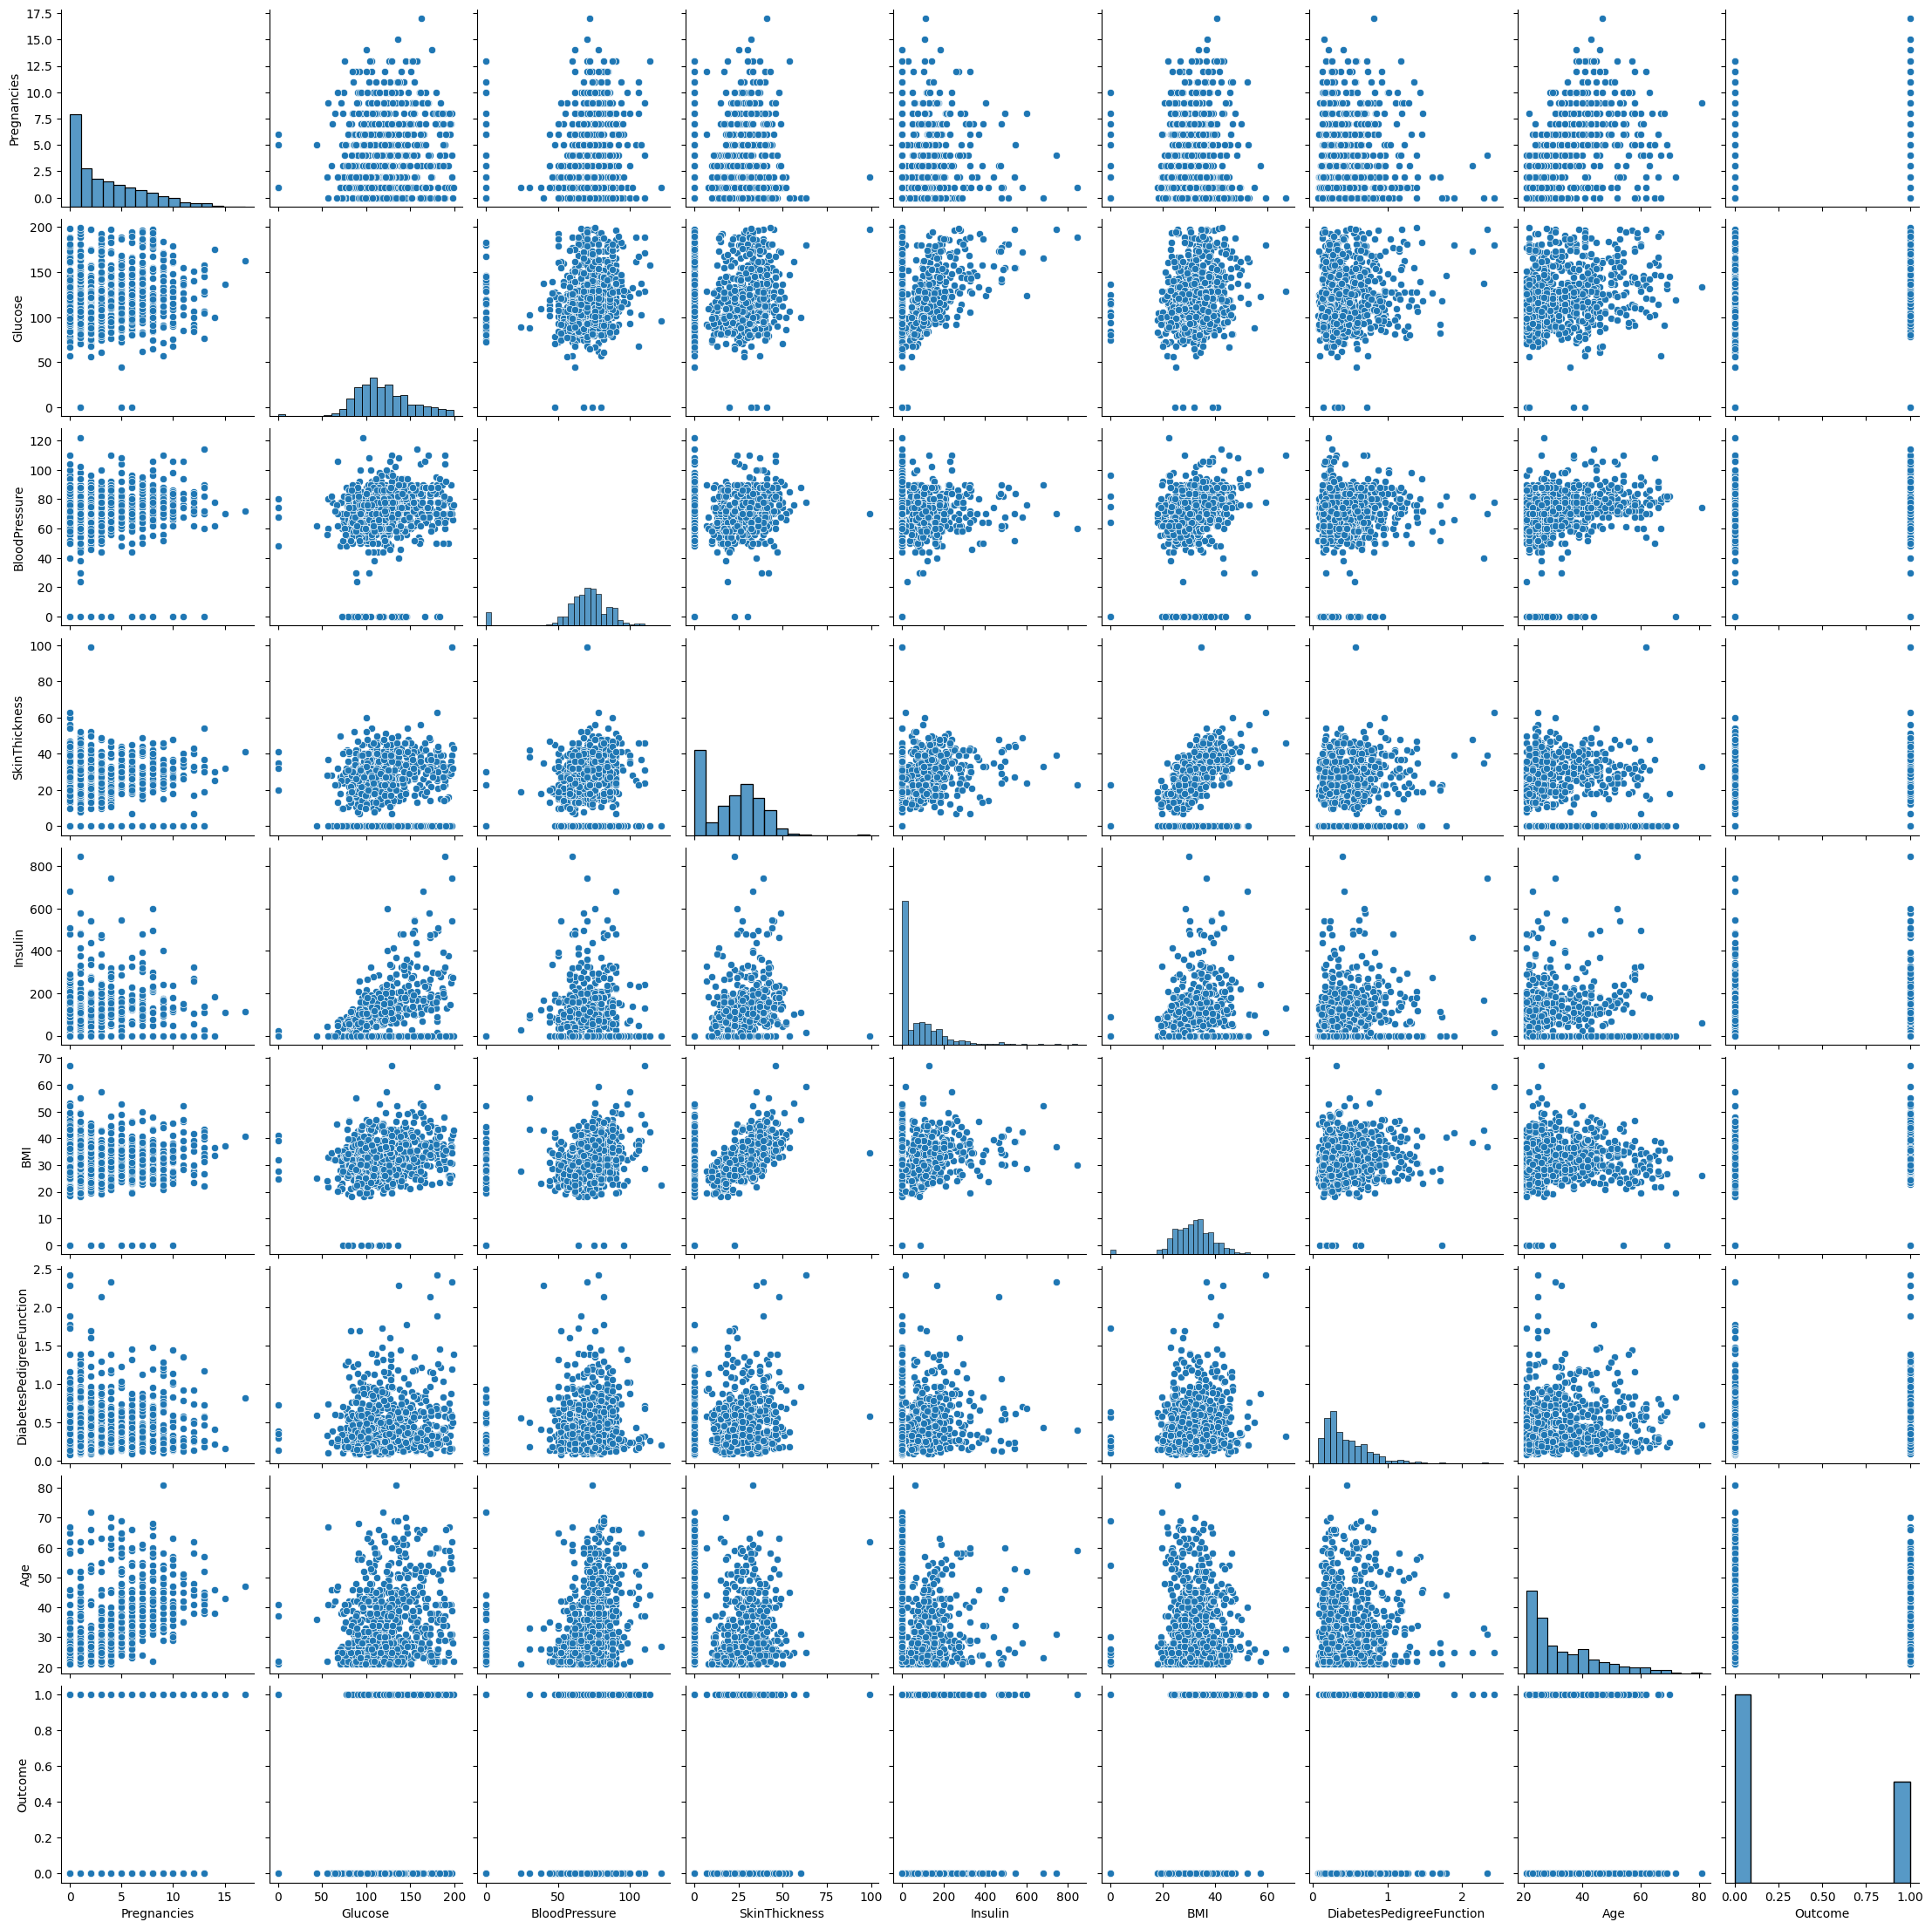

In [4]:
# General pairplot
sns.pairplot(data = total_data)

    FIRST TRAIN / TEST DIVISION 

_NOTE: This train/test split includes all the provided data without any exclusions. No outlier filtering, replacement, or variable merging has been performed at this stage. The seed used for the split is 42._

In [5]:
# CUSTOM FUNCTION for early train / test division
ut.early_split(total_data,'Outcome')

# dataframe.to_csv('early_total_data.csv',index = False)
# x_train.to_csv('early_x_train.csv', index = False )
# x_test.to_csv('early_x_test.csv', index = False )

    FEATURE ENGINEERING: OUTLIER ANALYSIS

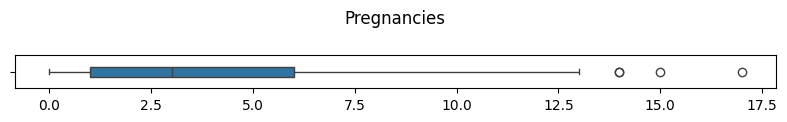

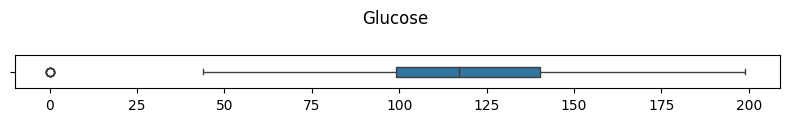

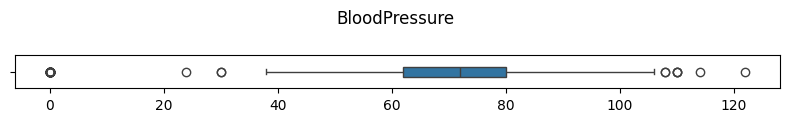

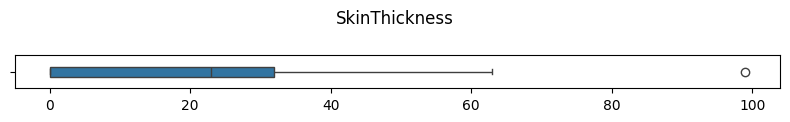

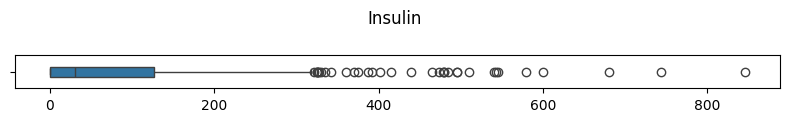

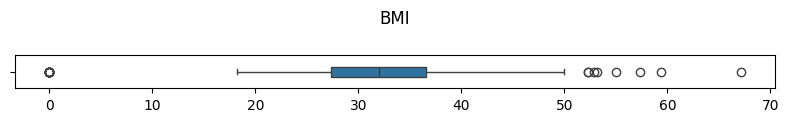

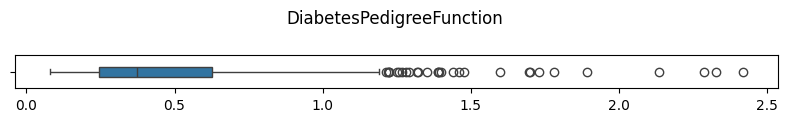

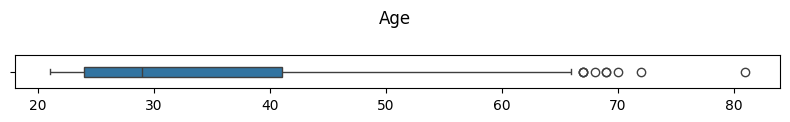

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# CUSTOM FUNCTION for standard outlier analysis
ut.outlier_analysis(total_data,'Outcome')

This standard analysis indicates the presence of outliers in all columns. However, after conducting open-source intelligence (OSINT) research on the variables, it becomes apparent that only records with a value of 0 in certain columns—specifically, Glucose, BloodPressure, and BMI—should be considered as genuine outliers, possibly resulting from input errors or other reasons. Given that there is already a copy of the data that includes outliers, the next step will involve dropping the identified outliers.

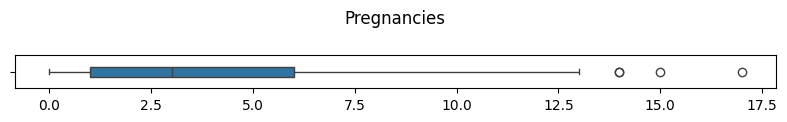

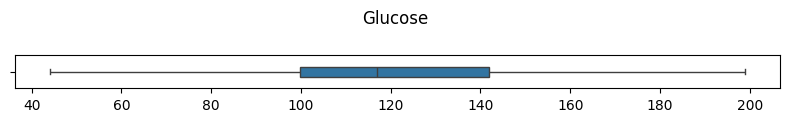

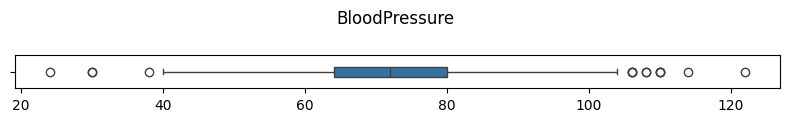

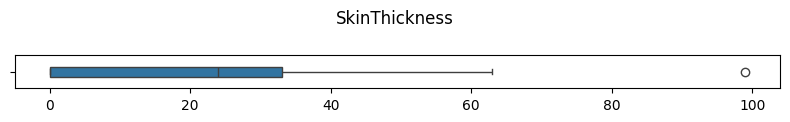

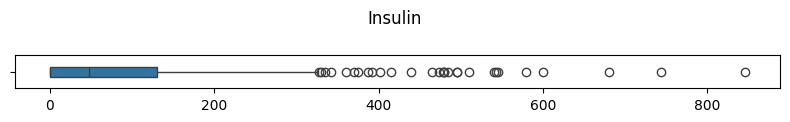

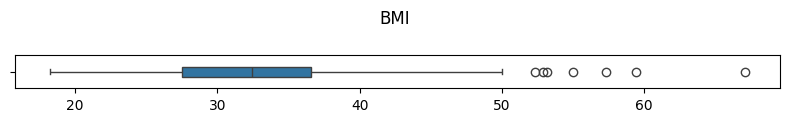

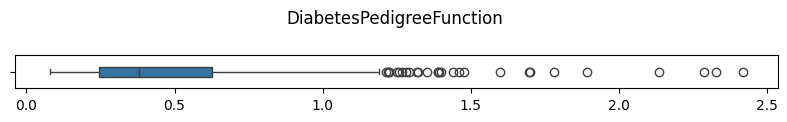

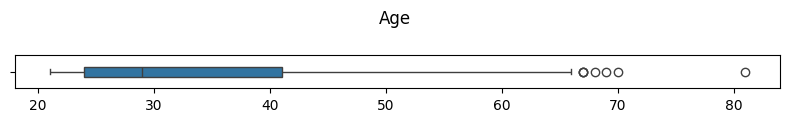

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
clean_total_data = total_data[(total_data['Glucose'] > 0) &
                              (total_data['BloodPressure'] > 0) &
                              (total_data['BMI'] > 0)]

ut.outlier_analysis(clean_total_data,'Outcome')

OJO REVISAR LOS OUTLIERS POR DERECHA (SKIN THINKNESS)